# Final Project - US Income Simulation

##### Sean Evers, Jacob Blackmore, Jack Kelleher, Haotian Liang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1 - Loading in the Datasets

### Federal Income Tax Rate - Lowest Bracket
https://fred.stlouisfed.org/series/IITTRLB

In [5]:
low_taxes = pd.read_csv("IITTRLB-Copy1.csv")
low_taxes.index = np.arange(1,47)
low_taxes.columns = ['Year', 'Low Tax Bracket']
low_taxes.head()

,Year,Low Tax Bracket
1,1974-01-01,14.0
2,1975-01-01,14.0
3,1976-01-01,14.0
4,1977-01-01,14.0
5,1978-01-01,14.0


### Federal Income Tax Rate - Highest Bracket
https://fred.stlouisfed.org/series/IITTRHB

In [6]:
high_taxes = pd.read_csv("IITTRHB-Copy1.csv")
high_taxes.index = np.arange(1,47)
high_taxes.columns = ['Year', 'High Tax Bracket']
high_taxes.head()

,Year,High Tax Bracket
1,1974-01-01,70.0
2,1975-01-01,70.0
3,1976-01-01,70.0
4,1977-01-01,70.0
5,1978-01-01,70.0


### Unemployment Rates
https://fred.stlouisfed.org/series/UNRATE

In [7]:
unemployment = pd.read_csv("UNRATE-2-Copy1.csv")
unemployment.index = np.arange(1,47)
unemployment.columns = ['Year', 'Unemployment']
unemployment.head()

,Year,Unemployment
1,1974-01-01,5.641667
2,1975-01-01,8.475000
3,1976-01-01,7.700000
4,1977-01-01,7.050000
5,1978-01-01,6.066667


### GDP, In Billions of Dollars
https://fred.stlouisfed.org/series/GDP

In [8]:
gdp = pd.read_csv("GDP-3-Copy1.csv")
gdp = gdp.iloc[27:,:]
gdp.index = np.arange(1,47)
gdp.head()

,DATE,GDP
1,1974-01-01,1545.24250
2,1975-01-01,1684.90500
3,1976-01-01,1873.41250
4,1977-01-01,2081.82500
5,1978-01-01,2351.59875


### 10 Year Treasury Rates
https://fred.stlouisfed.org/series/DGS10

In [9]:
treasury = pd.read_csv("DGS10-Copy1.csv")
treasury.index = np.arange(1,47)
treasury.head()

,DATE,DGS10
1,1974-01-01,7.562410
2,1975-01-01,7.993936
3,1976-01-01,7.612720
4,1977-01-01,7.417631
5,1978-01-01,8.408387


### CPI
https://fred.stlouisfed.org/series/CPIAUCSL

In [10]:
cpi = pd.read_csv("CPIAUCSL-Copy1.csv")
cpi = cpi.iloc[27:,:]
cpi.index = np.arange(1,47)
cpi.head()

,DATE,CPIAUCSL
1,1974-01-01,49.316667
2,1975-01-01,53.825000
3,1976-01-01,56.933333
4,1977-01-01,60.616667
5,1978-01-01,65.241667


### S&P 500 Returns
https://www.macrotrends.net/2526/sp-500-historical-annual-returns

In [14]:
sp500 = pd.read_csv("sp-500-historical-annual-returns-Copy1.csv")
sp500 = sp500.iloc[45:-3,:]
sp500.index = np.arange(1,47)
sp500.head()

,date,value
1,1973-12-31,-17.37
2,1974-12-31,-29.72
3,1975-12-31,31.55
4,1976-12-31,19.15
5,1977-12-30,-11.50


### Median Weekly Real Wages
https://fred.stlouisfed.org/series/LES1252881600Q

In [15]:
wages = pd.read_csv("MEPAINUSA672N-Copy1.csv")
wages = wages.iloc[:46,:]
wages.index = np.arange(1,47)
wages.head()

,DATE,MEPAINUSA672N
1,1974-01-01,25014
2,1975-01-01,24540
3,1976-01-01,24589
4,1977-01-01,24775
5,1978-01-01,24570


### Median Sale Price of Houses
https://fred.stlouisfed.org/series/MSPUS

In [16]:
houses = pd.read_csv("MSPUS-2-Copy1.csv")
houses = houses.iloc[10:,:]
houses.index = np.arange(1,47)
houses.head()

,DATE,MSPUS
1,1974-01-01,36050.0
2,1975-01-01,39275.0
3,1976-01-01,44225.0
4,1977-01-01,48900.0
5,1978-01-01,55850.0


### Industrial Production
https://fred.stlouisfed.org/series/INDPRO

In [17]:
indprod = pd.read_csv("INDPRO-2-Copy1.csv")
indprod = indprod.iloc[:46,:]
indprod.index = np.arange(1,47)
indprod.head()

,DATE,INDPRO
1,1974-01-01,46.272658
2,1975-01-01,42.151850
3,1976-01-01,45.472450
4,1977-01-01,48.948633
5,1978-01-01,51.641292


### Personal Consumption Expenditures
https://fred.stlouisfed.org/series/PCE

In [18]:
cpe = pd.read_csv("PCE-2-Copy1.csv")
cpe = cpe.iloc[:46,:]
cpe.index = np.arange(1,47)
cpe.head()

,DATE,PCE
1,1974-01-01,930.150000
2,1975-01-01,1030.558333
3,1976-01-01,1147.666667
4,1977-01-01,1273.975000
5,1978-01-01,1422.250000


### Personal Income
https://fred.stlouisfed.org/series/MEPAINUSA672N

In [19]:
p_income = pd.read_csv("MEPAINUSA672N-Copy1.csv")
p_income.index = np.arange(1,47)
p_income.head()

,DATE,MEPAINUSA672N
1,1974-01-01,25014
2,1975-01-01,24540
3,1976-01-01,24589
4,1977-01-01,24775
5,1978-01-01,24570


### Putting Them All Together

In [20]:
data = p_income

In [21]:
data.columns = ["Date", "Personal Income"]
data["High Tax Bracket"] = high_taxes.iloc[:,1]
data["Low Tax Bracket"] = low_taxes.iloc[:,1]
data["Unemployment Rate"] = unemployment.iloc[:,1]
data["GDP"] = gdp.iloc[:,1]
data["10 Yr Treasury Yield"] = treasury.iloc[:,1]
data["CPI"] = cpi.iloc[:,1]
data["SP500"] = sp500.iloc[:,1]
data["Wages"] = wages.iloc[:,1]
data["Houses"] = houses.iloc[:,1]
data["Industrial Production"] = indprod.iloc[:,1]
data["Consumer Expenditures"] = cpe.iloc[:,1]
data["Date"] = unemployment.iloc[:,0]
data.head()

,Date,Personal Income,High Tax Bracket,Low Tax Bracket,Unemployment Rate,GDP,10 Yr Treasury Yield,CPI,SP500,Wages,Houses,Industrial Production,Consumer Expenditures
1,1974-01-01,25014,70.0,14.0,5.641667,1545.24250,7.562410,49.316667,-17.37,25014,36050.0,46.272658,930.150000
2,1975-01-01,24540,70.0,14.0,8.475000,1684.90500,7.993936,53.825000,-29.72,24540,39275.0,42.151850,1030.558333
3,1976-01-01,24589,70.0,14.0,7.700000,1873.41250,7.612720,56.933333,31.55,24589,44225.0,45.472450,1147.666667
4,1977-01-01,24775,70.0,14.0,7.050000,2081.82500,7.417631,60.616667,19.15,24775,48900.0,48.948633,1273.975000
5,1978-01-01,24570,70.0,14.0,6.066667,2351.59875,8.408387,65.241667,-11.50,24570,55850.0,51.641292,1422.250000


### Part 2 - Multiple Linear/Log Regression

In [22]:
import statsmodels.api as sm
from scipy.stats import pearsonr

In [23]:
# defining our dependent variable
y = data["Personal Income"]
# defining our independent variables and dropping columns date and personal income
x = data.drop(columns = ["Date", "Personal Income"])

# adding constant for our intercept
x_with_cnst = sm.add_constant(x)

#running the model
model = sm.OLS(y, x_with_cnst)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Personal Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+27
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:53:11   Log-Likelihood:                 978.31
No. Observations:                  46   AIC:                            -1933.
Df Residuals:                      34   BIC:                            -1911.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.821e-11    1.5e-09     -0.039      0.969    -3.1e-09    2.99e-09
High Tax Bracket       5.116e-13   5.81e-12      0.088      0.930   -1.13e-11    1.23e-11
Low Tax Bracket        2.501e-12   2.13e-11      0.118      0.907   -4.07e-11    4.57e-11
Unemployment Rate      1.933e-12   3.88e-11      0.050      0.961   -7.69e-11    8.08e-11
GDP                    3.553e-14   5.27e-13      0.067      0.947   -1.03e-12    1.11e-12
10 Yr Treasury Yield   4.547e-13    2.1e-11      0.022      0.983   -4.23e-11    4.32e-11
CPI                   -2.274e-13   6.56e-12     -0.035      0.973   -1.36e-11    1.31e-11
SP500                 -1.137e-13   1.76e-12     -0.065      0.949   -3.68e-12    3.46e-12
Wages                     1.0000    4.4e-14   2.27e+13      0.000       1.000       1.000
Houses                 1.388e-16    3.6e-15      0.039      0.969   -7.18e-15    7.46e-15
Industrial Production -3.411e-13   9.51e-12     -0.036      0.972   -1.97e-11     1.9e-11
Consumer Expenditures -2.842e-14   7.21e-13     -0.039      0.969   -1.49e-12    1.44e-12
==============================================================================
Omnibus:                        5.463   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.282
Skew:                          -0.628   Prob(JB):                        0.118
Kurtosis:                       2.188   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What we see here is that each variable is insignificant except for real wages, but that our adjusted squared value is 1.00. Let's try our model again without real wages:

In [24]:
# running the model again but dropping wages because it is pretty much the same as our dependent variable
y = data["Personal Income"]
x = data.drop(columns = ["Date", "Personal Income", "Wages"])
x_with_cnst = sm.add_constant(x)

model = sm.OLS(y, x_with_cnst)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Personal Income   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.24e-25
Time:                        22:53:12   Log-Likelihood:                -355.27
No. Observations:                  46   AIC:                             732.5
Df Residuals:                      35   BIC:                             752.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.953e+04   2854.178     10.347      0.000    2.37e+04    3.53e+04
High Tax Bracket        -74.9473     18.351     -4.084      0.000    -112.202     -37.693
Low Tax Bracket          -4.8927     81.638     -0.060      0.953    -170.627     160.841
Unemployment Rate      -361.0322    135.858     -2.657      0.012    -636.838     -85.227
GDP                       1.3487      2.009      0.671      0.506      -2.730       5.428
10 Yr Treasury Yield   -103.4334     78.771     -1.313      0.198    -263.347      56.481
CPI                     -61.8559     22.914     -2.699      0.011    -108.374     -15.338
SP500                    -9.6318      6.546     -1.471      0.150     -22.920       3.657
Houses                   -0.0305      0.013     -2.377      0.023      -0.057      -0.004
Industrial Production   144.6749     27.090      5.341      0.000      89.680     199.670
Consumer Expenditures    -0.6137      2.768     -0.222      0.826      -6.233       5.005
==============================================================================
Omnibus:                        4.455   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.486
Skew:                          -0.657   Prob(JB):                        0.175
Kurtosis:                       3.305   Cond. No.                     5.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model is looking better now. Just how much do real wages predict changes in median income? Perhaps the two variables are pulled from the same data.

In [25]:
# running a linear regression of personal income ~ wages.
# if the two datasets are the same, we should expect an R squred value of 1, and correlation of 1
y = data["Personal Income"]
x = data["Wages"]
print(pearsonr(x,y))
x_with_cnst = sm.add_constant(x)

model = sm.OLS(y, x_with_cnst)
results = model.fit()
results.summary()

(0.9999999999999996, 0.0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Personal Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.445e+31
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:53:12   Log-Likelihood:                 1134.8
No. Observations:                  46   AIC:                            -2266.
Df Residuals:                      44   BIC:                            -2262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.365e-11   5.86e-12     -4.036      0.000   -3.55e-11   -1.18e-11
Wages          1.0000   2.02e-16   4.94e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     5454.301   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.696
Skew:                          -0.353   Prob(JB):                       0.0213
Kurtosis:                       1.125   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Because the correlation and R-squared value of our two csv files: Real Wages and Median Personal Income are both 1, this means that our files are pretty much the exact same. So in our other words, our project has just become: How to predict real wage growth. Going forward, we must not use wages in our regression.

### Part 3 - Determining The Best Model

#### Now that we have all of our relevant variables, lets try to come up with the best model.

In [26]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    '''The forward regression function determines the most statistically significant variables in a regression.
    X is a dataframe of our independent variables, including a column of constants (1). y is the response variable as
    a dataframe. threshold_in is the p_value that we want our variables to be below in order to be included in our model.
    Set verbose = True in order to view the step by step of variables added to the model and their respective p-value.
    
    Forward regression starts off by doing a regression against each individual variable. Then, we keep only the variable
    the lowest p-value and discard the rest. Then, we run regressions again with our previous variable and the rest of the
    variables, and keep the next variable with the lowest p-value and discard the rest. We keep adding variables until there
    are no variables left with a p-value that is below our threshold_in value.'''
    
    # initilaizing a list that will contain the variables in our model
    initial_list = []
    included = list(initial_list)
    
    # we are going to do a new linear regression until we break out of the loop
    while True:
        
        # setting changed = False. If do not add any more variables to our model, then we break out of the loop because of this
        changed=False
        
        # the variables that are NOT already in our model
        excluded = list(set(X.columns)-set(included))
        
        # initializing new_pval list with length equal to the variables not included in our model
        new_pval = pd.Series(index=excluded)
        
        # for each variable not in our model
        for column in excluded:
            
            # running a regression of our included variables + each variable not in our model
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[column]]))).fit()
            # updating our new_pval list. This will only contain the p_values of our excluded variables not already in the model
            new_pval[column] = model.pvalues[column]
            
        # find the lowest pval from our excluded list
        best_pval = new_pval.min()
        
        # if that lowest pval is less than our threshold:
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            # add it to our included list
            included.append(best_feature)
            
            # set changed = True so that we continue the loop
            changed=True
            
            # if verbose is set to true, outputs which variables are added and the p_value
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # if we go through this process and we do not find any items that 
        # have a p_value less than our threshold, changed will be false, and we break out of the loop
        if not changed:
            break

    return included

In [27]:
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    '''The backward regression function determines the most statistically significant variables in a regression.
    X is a dataframe of our independent variables, including a column of constants (1). y is the response variable as
    a dataframe. (1 - threshold_out) is the p_value that we want our variables to be below in order to be included in our model.
    Set verbose = True in order to view the step by step of variables added to the model and their respective p-value.
    
    Backward regression starts off with all variables in our model. After doing a regression, the highest p-value is
    calculated. If the variable with the highest p-value has a p-value higher than our threshold_out, then we remove it from
    from the model. Do this until all variables have p-values below the threshold_out.'''
    
    # the variables included in our model
    included=list(X.columns)
    
    # run through a loop until we break out
    while True:
        
        # setting changed = False. If do not add any more variables to our model, then we break out of the loop because of this
        changed=False
        # running a regression of our variables
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        
        # if the worst_pval is higher than our threshold:
        if worst_pval > threshold_out:
            
            # set changed = true to continue with the loop
            changed=True
            
            # remove the variable from our model
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            
            #print verbose if verbose = true
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
                
        # break out of the loop if no variables are excluded
        if not changed:
            break
    return included

Source: https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

In [28]:
# lets calculate our variables to pass into the functions
y = data["Personal Income"]
x = data.drop(columns = ["Date", "Personal Income", "Wages"])
x_with_cnst = sm.add_constant(x)

In [29]:
forward_regression(x_with_cnst, y, threshold_in = 0.05)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launche

['const',
 'Industrial Production',
 'Unemployment Rate',
 '10 Yr Treasury Yield',
 'SP500']

In [30]:
backward_regression(x_with_cnst, y, threshold_out = 0.05)

['const',
 'High Tax Bracket',
 'Unemployment Rate',
 'GDP',
 'CPI',
 'Houses',
 'Industrial Production']

These two models should include variables that are all statistically significant.

### Forward Regression Model

In [31]:
y = data["Personal Income"]

# we are going to drop all of the variables that are not in our forward model
x = data.drop(columns = ["Date", "High Tax Bracket", "Low Tax Bracket", "Personal Income", "Wages", "CPI", "GDP", "Houses", "Consumer Expenditures"])
x_with_cnst = sm.add_constant(x)

model = sm.OLS(y, x_with_cnst)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Personal Income   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     261.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.35e-28
Time:                        22:53:18   Log-Likelihood:                -365.07
No. Observations:                  46   AIC:                             740.1
Df Residuals:                      41   BIC:                             749.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.331e+04   1428.399     16.316      0.000    2.04e+04    2.62e+04
Unemployment Rate      -412.4072     75.543     -5.459      0.000    -564.969    -259.846
10 Yr Treasury Yield   -179.1327     70.616     -2.537      0.015    -321.745     -36.520
SP500                   -13.2388      6.552     -2.020      0.050     -26.472      -0.006
Industrial Production   119.0190     10.703     11.120      0.000      97.404     140.634
==============================================================================
Omnibus:                        2.128   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.472
Skew:                          -0.433   Prob(JB):                        0.479
Kurtosis:                       3.140   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the unemployment rate, 10 Yr Treasury Yield, and Industrial Production Index, and the S&P500, we can explain about 96% of the variation in real wages/personal income.

forward_model = 23310 - 412.4072(unemployment) - 179.1327(10 Yr Treasury) - 13.2388(S&P500) + 119.0190(Industrial Production)

In [32]:
# lets plot our model against actual income
q = gdp.iloc[:,0]
unemployment_rate = data["Unemployment Rate"]
yields = data["10 Yr Treasury Yield"]
sp_500 = data["SP500"]
industrial_production = data["Industrial Production"]

# using the coefficients in our model to calculate median incomes
t = 23310 - 412.4072*(unemployment_rate) - 179.1327*(yields) - 13.2388*(sp_500) + 119.0190*(industrial_production)

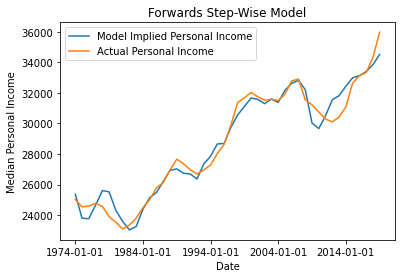

In [33]:
plt.plot(q,t, label = "Model Implied Personal Income")
plt.plot(q, data["Personal Income"], label = "Actual Personal Income")
plt.xticks(np.arange(0, len(x)+1, 10))
plt.title("Forwards Step-Wise Model")
plt.xlabel("Date")
plt.ylabel("Median Personal Income")
plt.legend()

### Backwards Regression Model

In [34]:
y = data["Personal Income"]
# dropping all variabels not included in our backward regression model
x = data.drop(columns = ["Date", "Low Tax Bracket", "Personal Income", "Wages", "SP500", "Consumer Expenditures", "10 Yr Treasury Yield"])
x_with_cnst = sm.add_constant(x)

model = sm.OLS(y, x_with_cnst)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Personal Income   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     225.2
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.13e-28
Time:                        22:53:19   Log-Likelihood:                -358.27
No. Observations:                  46   AIC:                             730.5
Df Residuals:                      39   BIC:                             743.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.927e+04   1907.298     15.346      0.000    2.54e+04    3.31e+04
High Tax Bracket        -86.3976     17.676     -4.888      0.000    -122.150     -50.645
Unemployment Rate      -342.9998     94.499     -3.630      0.001    -534.142    -151.858
GDP                       1.1485      0.225      5.105      0.000       0.693       1.604
CPI                     -75.5190     18.454     -4.092      0.000    -112.846     -38.192
Houses                   -0.0375      0.012     -3.230      0.003      -0.061      -0.014
Industrial Production   159.7341     23.022      6.938      0.000     113.167     206.301
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.269
Skew:                          -0.046   Prob(JB):                        0.874
Kurtosis:                       3.363   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting Our Model

backwards_model = 29270 -86.3976(high_tax_bracket) -342.9998(unemployment_rate) + 1.1485(gdp) -75.5190(cpi) -0.0375(houses) + 159.7341(industrial_production)

In [35]:
x = gdp.iloc[:,0]
high_tax_bracket = data["High Tax Bracket"]
unemployment_rate = data["Unemployment Rate"]
gdp = data["GDP"]
cpi = data["CPI"]
houses = data["Houses"]
industrial_production = data["Industrial Production"]
# using our model equation to calculate median income
y = 29270 -86.3976*(high_tax_bracket) -342.9998*(unemployment_rate) + 1.1485*(gdp) -75.5190*(cpi) -0.0375*(houses) + 159.7341*(industrial_production)

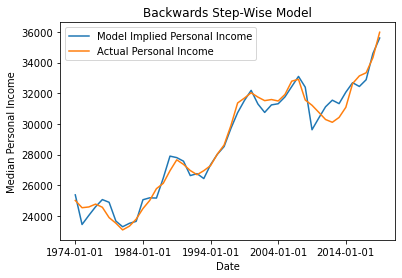

In [36]:
plt.plot(x,y, label = "Model Implied Personal Income")
plt.plot(x, data["Personal Income"], label = "Actual Personal Income")
plt.xticks(np.arange(0, len(x)+1, 10))
plt.title("Backwards Step-Wise Model")
plt.xlabel("Date")
plt.ylabel("Median Personal Income")
plt.legend()